In [2]:
import pymongo
import pandas as pd
import numpy as np
from collections import Counter
import os
import sys
import ssl
import math

In [3]:
pwd = %pwd
sys.path.insert(0, os.path.dirname(pwd))
pwd = os.path.join(os.path.dirname(pwd), 'dados')

In [4]:
data = pd.read_csv(os.path.join(pwd, 'ml_inputs.csv'), sep=';')

In [5]:
data.head(5)

,Basófilos,Concentração de Hemoglobina Corpuscular,Eosinófilos,Eritrócitos,Hematócrito,Hemoglobina,Hemoglobina Corpuscular Média,Leucócitos,Linfócitos,Monócitos,"Morfologia, Série Branca","Morfologia, Série Vermelha",Neutrófilos,Plaquetas,RDW,VCM,Volume plaquetário médio,class
0,80.0,33.4,110.0,5.66,42.2,14.1,24.9,10440.0,3460.0,850.0,não foram observados caracteres tóxico-degener...,microcitose discreta,5940.0,254000.0,13.6,74.6,10.575065,desconhecido
1,40.0,34.0,360.0,4.84,47.1,16.0,33.1,4370.0,1720.0,390.0,não foram observados caracteres tóxico-degener...,normais,1860.0,160000.0,12.8,97.3,11.200000,negativo
2,30.0,34.4,140.0,4.55,40.7,14.0,30.8,5140.0,2080.0,410.0,não foram observados caracteres tóxico-degener...,normais,2480.0,214000.0,12.5,89.5,12.200000,negativo
3,70.0,33.3,10.0,4.43,40.5,13.5,30.5,6340.0,2100.0,530.0,não foram observados caracteres tóxico-degener...,normais,3630.0,260000.0,13.0,91.4,10.300000,negativo
4,80.0,31.7,220.0,4.84,41.0,13.0,26.9,7240.0,2570.0,630.0,não foram observados caracteres tóxico-degener...,normais,3740.0,286000.0,13.7,84.7,10.700000,desconhecido


Verifica quantos casos existem para cada classe

In [6]:
Counter(data['class'])

Counter({'desconhecido': 753, 'negativo': 7200, 'positivo': 236})

In [7]:
data.drop(data[data['class'] == 'desconhecido'].index,axis=0, inplace=True)

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

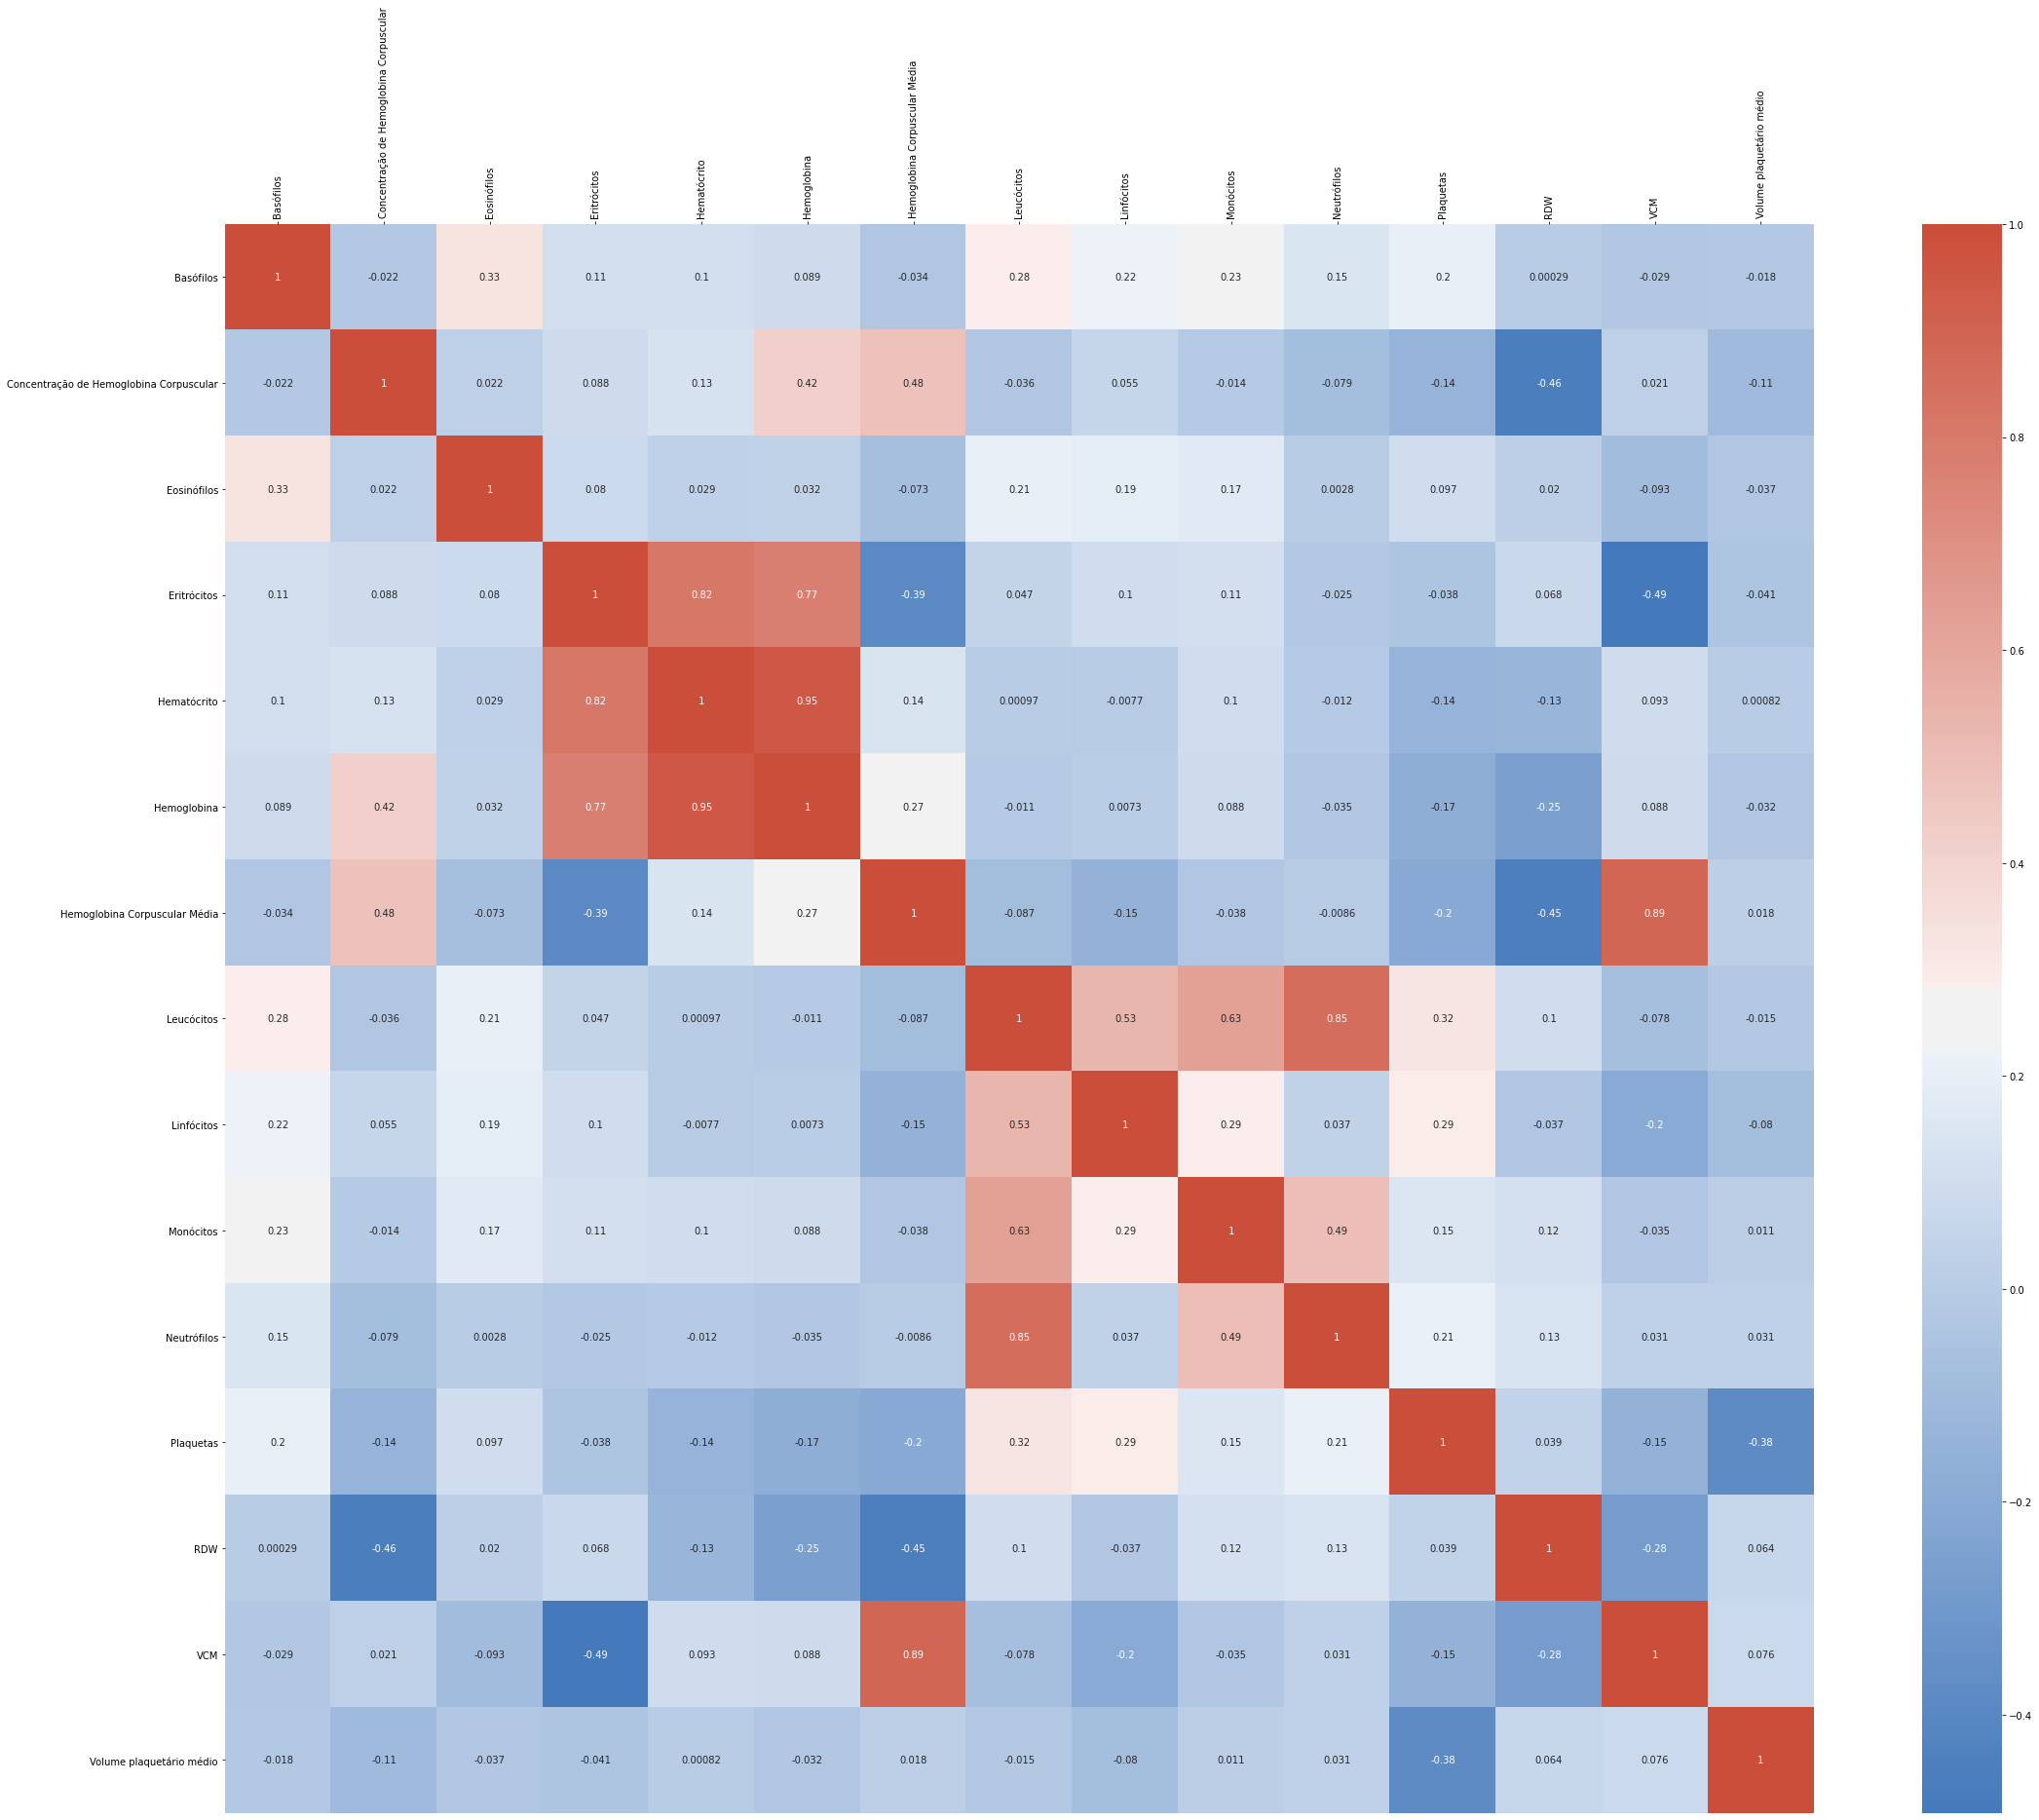

In [63]:
fig = plt.figure(figsize=(40, 30))
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_ticks_position('top')

cols = [x for x in data.columns if x != 'class']

sns.heatmap(
    data.corr(),
    cmap = sns.diverging_palette(250, len(cols), as_cmap=True),
    square=True,
    annot=True
)

In [65]:
data.drop(
    ['Hemoglobina Corpuscular Média','Hematócrito','Neutrófilos'],
    axis=1,
    inplace=True
)

Transforma os dados categoricos em numericos

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoders = {x:LabelEncoder() for x in ['Morfologia, Série Branca', 'Morfologia, Série Vermelha', 'class']}

In [32]:
for c in encoders.keys():
    encoders[c].fit(data[c])
    data[c] = encoders[c].transform(data[c])

In [33]:
data.head(5)

,pc1,pc2,pc3,"Morfologia, Série Branca","Morfologia, Série Vermelha",class
0,-94905.268642,-1740.518839,284.604928,24,79,0
1,-40896.755280,-1350.345759,256.816358,24,79,0
2,5118.159203,-245.337913,-165.557861,24,79,0
3,21154.576925,2492.362402,749.433353,24,79,0
4,9124.470472,345.538769,-441.241787,24,79,0


# Machine Learning

In [18]:
import sklearn.model_selection as model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

Aplica o processo de normalização por MaxMin

In [141]:
scaler = MinMaxScaler()
scaler.fit(data.drop('class', axis=1))

MinMaxScaler()

In [142]:
target = data['class'].tolist()
data = scaler.transform(data.drop('class', axis=1))

In [36]:
target = data['class'].tolist()
data = data.drop('class', axis=1)

KeyError: 'class'

## Classificação convencional

Divide os dados entre treinamento e teste

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.drop(['pc2','pc3'],axis=1), target, test_size=0.2, random_state=2578)

In [39]:
print(f"Train: {dict(Counter(encoders['class'].inverse_transform(y_train)))}")
print(f"Test: {dict(Counter(encoders['class'].inverse_transform(y_test)))}")

Train: {'negativo': 5764, 'positivo': 184}
Test: {'negativo': 1436, 'positivo': 52}


In [40]:
model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000
)

In [41]:
model.fit(X_train, y_train)

MLPClassifier()

In [42]:
y_pred = model.predict(X_test)

In [43]:
import sklearn.metrics as metrics

In [44]:
y_acc = y_pred == y_test
y_true = [True] * len(y_acc)
{
    'ACCURACY': metrics.accuracy_score(y_true, y_acc),
    'F1': metrics.f1_score(y_true, y_acc, average='weighted', pos_label=True),
    'F1_MICRO': metrics.f1_score(y_true, y_acc, average='micro', pos_label=True),
    'F1_MACRO': metrics.f1_score(y_true, y_acc, average='macro', pos_label=True),
    'PRECISION': metrics.precision_score(y_true, y_acc, average='binary', pos_label=True),
    'RECALL': metrics.recall_score(y_true, y_acc, average='binary', pos_label=True),
    'KAPPA': metrics.cohen_kappa_score(y_true, y_acc),
    'ACERTOS': Counter(y_acc)[True],
    'ERROS': Counter(y_acc)[False],
    'COVERAGE': 1-(Counter(y_acc)[False]/len(pd.Series(y_test)[~y_acc]))
}

{'ACCURACY': 0.9650537634408602,
 'F1': 0.9822161422708618,
 'F1_MICRO': 0.9650537634408602,
 'F1_MACRO': 0.4911080711354309,
 'PRECISION': 1.0,
 'RECALL': 0.9650537634408602,
 'KAPPA': 0.0,
 'ACERTOS': 1436,
 'ERROS': 52,
 'COVERAGE': 0.0}

## Anomaly detection

In [45]:
from sklearn import svm

Vamos tentar abordar isso como um problema de detecção de anomalias

In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, [True if x == 1 else False for x in target], test_size=0.2, random_state=2578)

In [47]:
print(f"Train: {Counter(y_train)}")
print(f"Test: {Counter(y_test)}")

Train: Counter({False: 5764, True: 184})
Test: Counter({False: 1436, True: 52})


In [ ]:
model = svm.OneClassSVM(nu=0.15, kernel="linear", gamma=0.1)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = [False if x == 1 else True for x in y_pred]

In [ ]:
y_acc = pd.Series(y_pred) == pd.Series(y_test)
{
    'ACCURACY': metrics.accuracy_score(y_test, y_pred),
    'F1': metrics.f1_score(y_test, y_pred, average='weighted', pos_label=True),
    'F1_MICRO': metrics.f1_score(y_test, y_pred, average='micro', pos_label=True),
    'F1_MACRO': metrics.f1_score(y_test, y_pred, average='macro', pos_label=True),
    'PRECISION': metrics.precission_score(y_test, y_pred, average='binary', pos_label=True),
    'RECALL': metrics.recall_score(y_test, y_pred, average='binary', pos_label=True),
    'KAPPA': metrics.cohen_kappa_score(y_test, y_pred),
    'ACERTOS': Counter(y_acc)[True],
    'ERROS': Counter(y_acc)[False],
    'COVERAGE': 1-(Counter(y_acc)[False]/len(pd.Series(y_test)[~y_acc]))
}

Ainda sem sucesso

### Analise de componentes principais

In [8]:
from sklearn.decomposition import PCA

In [21]:
data = pd.read_csv(os.path.join(pwd, 'ml_inputs.csv'), sep=';')

In [22]:
data.head(5)

,Basófilos,Concentração de Hemoglobina Corpuscular,Eosinófilos,Eritrócitos,Hematócrito,Hemoglobina,Hemoglobina Corpuscular Média,Leucócitos,Linfócitos,Monócitos,"Morfologia, Série Branca","Morfologia, Série Vermelha",Neutrófilos,Plaquetas,RDW,VCM,Volume plaquetário médio,class
0,80.0,33.4,110.0,5.66,42.2,14.1,24.9,10440.0,3460.0,850.0,não foram observados caracteres tóxico-degener...,microcitose discreta,5940.0,254000.0,13.6,74.6,10.575065,desconhecido
1,40.0,34.0,360.0,4.84,47.1,16.0,33.1,4370.0,1720.0,390.0,não foram observados caracteres tóxico-degener...,normais,1860.0,160000.0,12.8,97.3,11.200000,negativo
2,30.0,34.4,140.0,4.55,40.7,14.0,30.8,5140.0,2080.0,410.0,não foram observados caracteres tóxico-degener...,normais,2480.0,214000.0,12.5,89.5,12.200000,negativo
3,70.0,33.3,10.0,4.43,40.5,13.5,30.5,6340.0,2100.0,530.0,não foram observados caracteres tóxico-degener...,normais,3630.0,260000.0,13.0,91.4,10.300000,negativo
4,80.0,31.7,220.0,4.84,41.0,13.0,26.9,7240.0,2570.0,630.0,não foram observados caracteres tóxico-degener...,normais,3740.0,286000.0,13.7,84.7,10.700000,desconhecido


In [23]:
data.drop(data[data['class'] == 'desconhecido'].index,axis=0, inplace=True)
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)

In [24]:
numeric_columns = data.columns[(data.dtypes.values == np.dtype('float64'))]
nonnumeric_columns = data.columns[(data.dtypes.values != np.dtype('float64'))]

In [25]:
pca = PCA(n_components=3, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=2578)

In [26]:
pca.fit(data[numeric_columns])
pc = pd.DataFrame(pca.transform(data[numeric_columns]))

In [27]:
len(data)

7436

In [28]:

data = pd.concat([pc, data[nonnumeric_columns]], axis=1, ignore_index=False).rename(columns={0:'pc1',1:'pc2',2:'pc3'})

In [29]:
data

,pc1,pc2,pc3,"Morfologia, Série Branca","Morfologia, Série Vermelha",class
0,-94905.268642,-1740.518839,284.604928,não foram observados caracteres tóxico-degener...,normais,negativo
1,-40896.755280,-1350.345759,256.816358,não foram observados caracteres tóxico-degener...,normais,negativo
2,5118.159203,-245.337913,-165.557861,não foram observados caracteres tóxico-degener...,normais,negativo
3,21154.576925,2492.362402,749.433353,não foram observados caracteres tóxico-degener...,normais,negativo
4,9124.470472,345.538769,-441.241787,não foram observados caracteres tóxico-degener...,normais,negativo
...,...,...,...,...,...,...
7431,-61881.850539,338.348879,-707.328885,não foram observados caracteres tóxico-degener...,normais,negativo
7432,-46893.291079,-1359.721256,1416.741887,granulações tóxicas pouco abundantes em alguns...,microcitose discreta,negativo
7433,-97903.337642,-1295.058065,-596.900722,não foram observados caracteres tóxico-degener...,normais,positivo
7434,-1894.676782,-1527.618870,621.967208,não foram observados caracteres tóxico-degener...,normais,negativo
